## Mean / median imputation with Scikit-learn ==> SimpleImputer

The **SimpleImputer** class of Scikit-learn imputes missing values, by **mean** and **median** (numeric variables), by **frequent category** (categorical variables) and **arbitrary value** (categorical and numerical variables). **Simple to use** if applied to the entire dataframe, it has **good quality code**, and **Fast computation** (by numpy), allows for **grid search** over the various imputation techniques and allows for **different missing values encodings** (you can indicate if the missing values are np.nan, or zeroes, etc). It returns a numpy array instead of a pandas dataframe, inconvenient for data analysis, requires more lines of code!

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [30]:
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

In [31]:
data = pd.read_csv('housingPrices_train.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [32]:
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [33]:
cols_to_use.remove('SalePrice')
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [34]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

In [35]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='median')

**Note, if you want to do mean imputation instead of median, pass the argument 'mean' to 'strategy'**

In [36]:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [37]:
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

**Note** that SimpleImputer learns the **medians of ALL the variables** in the dataset, those with NA and those without NA.

**Impute the train and test set--> Returned to a numpy array!!!**

In [38]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

**Set back to a dataframe:**

In [39]:
pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


**Explore the change in the distributions after the median imputation!**

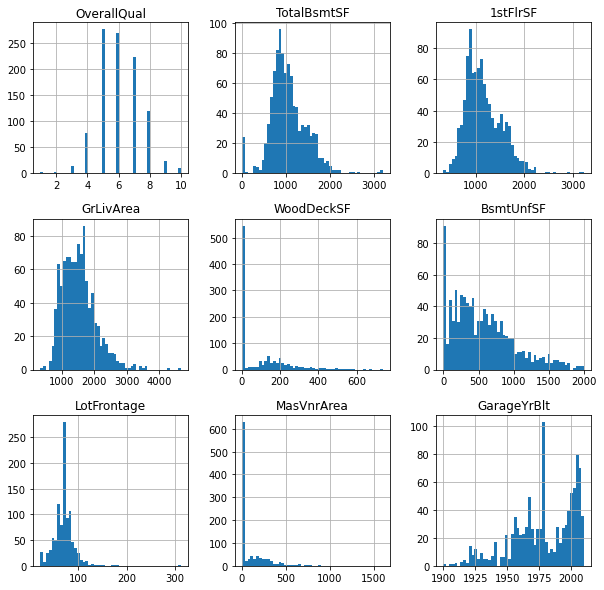

In [40]:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note in the variable **LotFrontAge the tall bar at the value of the median** in the histogram, which appears after the data imputation.

**A MASSIVE NOTE OF CAUTION**: when encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MISS-REPRESENTING the data!! **You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order** in which they were in the X_train BEFORE the transformation!.


### SimpleImputer: different procedures on different features

On occasions, we want to implement **different imputation techniques to different features**! To do that, we use another class called **ColumnTransformer**. **Note** ColumnTransformer is in beta version. More details about the ColumnTransformer in the [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],# predictors only
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [42]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

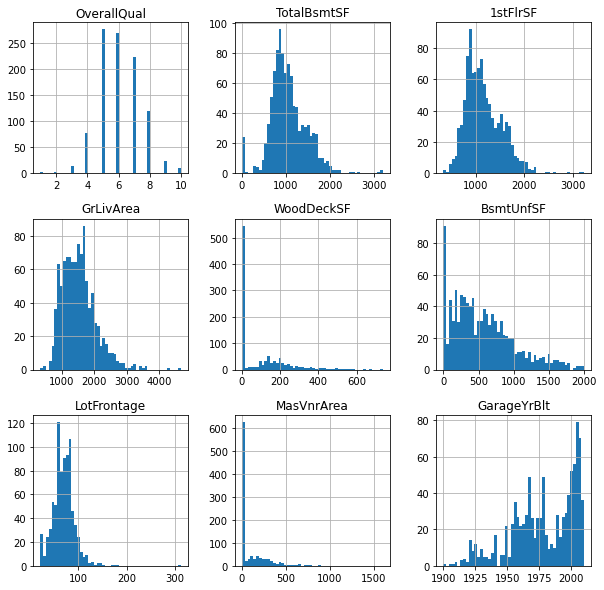

In [43]:
X_train.hist(bins=50, figsize=(10,10))
plt.show()

Now we impute **LotFrontage with the mean**, and **MasVnrArea and GarageYrBlt with the median**, as those variables are **quite skewed**.

**Parameters of the ColumnTransformer!**

In [44]:
numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']
preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), numeric_features_mean),
    ('median_imputer', SimpleImputer(strategy='median'), numeric_features_median)
], remainder='passthrough')  # passthrough, to retain ALL the columns!

**Fit the preprocessor!**

In [45]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

**Explore the transformers like this:**

In [46]:
preprocessor.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

**and we can look at the parameters learnt like this:**

In [47]:
preprocessor.named_transformers_['mean_imputer'].statistics_  # for the mean imputer

array([69.66866747])

**and we can corroborate the value with that one in the train set**

In [48]:
X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

**For the median imputer there are 2 values learnt!**

In [49]:
preprocessor.named_transformers_['median_imputer'].statistics_

array([   0., 1979.])

**and we corroborate those values in the train set!**

In [50]:
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [51]:
X_train = preprocessor.transform(X_train), # and now we can impute the data
np.mean(np.isnan(X_train))  # and check it worked

0.0

In [52]:
X_test = preprocessor.transform(X_test)  # and now we can impute the test data
np.mean(np.isnan(X_test))  # and check it worked

0.0

**Remember that the returned object  is a NumPy array!**

In [53]:
X_train

(array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
          576.        ,  318.        ],
        [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
          307.        ,  288.        ],
        [  50.        ,    0.        , 1979.        , ...,  858.        ,
          117.        ,  162.        ],
        ...,
        [  68.        ,    0.        , 1978.        , ..., 1902.        ,
            0.        ,    0.        ],
        [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
          143.        , 1374.        ],
        [  58.        ,   30.        , 1998.        , ..., 1839.        ,
            0.        , 1195.        ]]),)

**When putting the array back into a dataframe, attention on the column order!**

In [54]:
preprocessor.transformers_

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

**'remainder', 'passthrough', [0, 1, 2, 3, 4, 5] !** the code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train

**Capture the columns in a list**

In [55]:
remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

**Capture the data back in a dataframe!**

In [65]:
cols = numeric_features_mean + numeric_features_median + remainder_cols
cols

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [69]:
pd.DataFrame(X_test,
    columns = cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.668667,0.0,1975.0,6.0,2035.0,2515.0,2515.0,0.0,816.0
1,79.000000,0.0,1941.0,6.0,806.0,958.0,1578.0,0.0,238.0
2,69.668667,161.0,1950.0,5.0,709.0,979.0,1203.0,0.0,524.0
3,83.000000,299.0,1977.0,7.0,1160.0,1156.0,2022.0,288.0,768.0
4,21.000000,381.0,1971.0,6.0,525.0,525.0,1092.0,0.0,525.0


**ANOTHER NOTE OF CAUTION**

**ColumnTransformer** is in essence just **slicing the dataframe** in the required features. **Then the SimpleImputer operates on the sliced dataframe.** If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

- ColumnTransformer first creates a single column dataframe with the first feature, LotFrontage
- ColumnTransformer creates a 2 column dataframe with the features MasVnrArea and GarageBlt
- ColumnTransformer creates an additional dataframe with the remaining features in the train set
- The SimpleImputers learn the parameters in their respective sliced dataframes
- ColunmnTransformer contatenates back all the dataframes into the final result